<a href="https://colab.research.google.com/github/haaraamk/data_practice/blob/main/%5B2%EA%B8%B0_%EC%82%AC%EC%A0%84%EA%B3%BC%EC%A0%9C%EC%A0%9C%EC%B6%9C%5D_%EA%B0%95%ED%95%98%EB%9E%8C_(20212049)_%EA%B3%BC%EC%A0%9C_%EC%A7%84%ED%96%89_%EC%BD%94%EB%93%9C_%ED%8C%8C%EC%9D%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**강하람 DArt-B 사전 과제**

#파일 불러오기

In [1]:
from google.colab import drive

# 드라이브 마운트
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dpath = "/content/drive/MyDrive/"

In [97]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [47]:
# 엑셀 파일 읽기
data_info = pd.read_excel(dpath+'[DArt-B 2기] data_info.xlsx')
data = pd.read_excel(dpath+'[DArt-B 2기] grocery_store.xlsx')

#데이터 정제

In [48]:
# 데이터 출력 또는 처리
print(data_info.head())
print(data.head())
 # 데이터프레임의 처음 몇 줄을 출력합니다.

   Unnamed: 0            컬럼 명       설명       비고
0         NaN        order_id    주문 번호      NaN
1         NaN   customer_name      고객명  NULL 존재
2         NaN  new_order_date     주문일자      NaN
3         NaN      order_year     주문년도      NaN
4         NaN      month_name  주문월(이름)      NaN
   Unnamed: 0 order_id customer_name new_order_date  order_year month_name  \
0         NaN      OD1        Harish     2017-11-08        2017   November   
1         NaN      OD2         Sudha     2017-11-08        2017   November   
2         NaN      OD3       Hussain     2017-06-12        2017       June   
3         NaN      OD4       Jackson     2016-10-11        2016    October   
4         NaN      OD5       Ridhesh     2016-10-11        2016    October   

   order_month  order_day          category      sub_category  cost_of_sales  \
0           11          8      Oil & Masala           Masalas         852.72   
1           11          8         Beverages     Health Drinks         599.20   
2  

In [49]:
 # 두 파일 모두 첫 열이 비어있으므로 첫 열을 제거합니다.
data_info = data_info.iloc[:, 1:]
data = data.iloc[:, 1:]

In [50]:
print(data_info.head())
print(data.head())

             컬럼 명       설명       비고
0        order_id    주문 번호      NaN
1   customer_name      고객명  NULL 존재
2  new_order_date     주문일자      NaN
3      order_year     주문년도      NaN
4      month_name  주문월(이름)      NaN
  order_id customer_name new_order_date  order_year month_name  order_month  \
0      OD1        Harish     2017-11-08        2017   November           11   
1      OD2         Sudha     2017-11-08        2017   November           11   
2      OD3       Hussain     2017-06-12        2017       June            6   
3      OD4       Jackson     2016-10-11        2016    October           10   
4      OD5       Ridhesh     2016-10-11        2016    October           10   

   order_day          category      sub_category  cost_of_sales  discount  \
0          8      Oil & Masala           Masalas         852.72      0.12   
1          8         Beverages     Health Drinks         599.20      0.18   
2         12       Food Grains      Atta & Flour        2194.80      0.21   
3

#데이터 확인

In [51]:
data.describe()

,order_year,order_month,order_day,cost_of_sales,discount,profit,total_sales
count,10024.000000,10024.000000,10024.000000,9994.000000,10024.000000,10024.000000,10024.000000
mean,2016.729050,7.807462,15.467678,1121.659075,0.226793,374.649015,1497.006285
std,1.128751,3.284604,8.750431,472.619706,0.074635,239.768566,577.584781
min,2015.000000,1.000000,1.000000,275.000000,0.100000,25.250000,500.000000
25%,2016.000000,5.000000,8.000000,724.910000,0.160000,180.000000,1000.000000
50%,2017.000000,9.000000,15.000000,1095.765000,0.230000,320.335000,1499.000000
75%,2018.000000,11.000000,23.000000,1458.405000,0.290000,525.307500,1995.000000
max,2019.000000,12.000000,31.000000,2367.400000,0.350000,1120.950000,2500.000000


기술 통계량을 살펴보았을 때 음수가 나오면 안되는 값이 음수가 나오거나 하는 경우는 없는 것 같다. 전체적인 기술 통계량을 살펴보고 넘어간다.

구매 기록이 들어있는 이 데이터로 구할 수 있는 정보들을 생각해본다.


일단 년,월,일 당 구매 건수, 구매 월별 구매 카테고리의 변화, 할인율 별 구매 건수, 지역별 구매 건수 등의 정보들이 유용하게 이용될 수 있을 것 같다.


따라서 데이터의 구매 기록을 원하는 변수 당 누적 구매 횟수로 합산하여 새 데이터 프레임들을 생성한다.




데이터의 구매 기록을 원하는 변수(예: 연도, 월, 일, 카테고리, 할인율, 지역 등) 별로 누적 구매 횟수로 합산하여 새 데이터프레임을 생성하는 것은 데이터를 요약하고 다양한 관점에서 분석하기 위한 중요한 단계이다.


이렇게 생성된 새로운 데이터프레임들은 다양한 유용한 정보를 제공하며 의사 결정에 도움이 될 수 있다.

In [70]:
#년,월,일 별 구매건수
year = pd.DataFrame(data['order_year'].value_counts())
month = pd.DataFrame(data['order_month'].value_counts())
day = pd.DataFrame(data['order_day'].value_counts())

In [79]:
#인덱스 기준으로 정렬한다.
year = year.sort_index(ascending=True)
month = month.sort_index(ascending=True)
day = day.sort_index(ascending=True)

##연도별 구매횟수

In [81]:
year
# 구매건수가 점점 늘다가 19년에 확 줄었다. 19년 초반 데이터라고 추측 가능

,order_year
2015,1993
2016,2102
2017,2587
2018,3312
2019,30


In [84]:
data.sort_values(by='new_order_date', ascending=False).head(20)
#예측과 다르게 그냥 19년의 구매건수가 적은 것으로 확인

,order_id,customer_name,new_order_date,order_year,month_name,order_month,order_day,category,sub_category,cost_of_sales,discount,profit,total_sales,region,city
10019,OD10020,NaN,2019-11-21,2019,November,11,21,NaN,NaN,NaN,0.20,85.28,2347,East,Tenkasi
10021,OD10022,NaN,2019-11-20,2019,November,11,20,NaN,NaN,NaN,0.28,426.69,1327,East,Chennai
10008,OD10009,NaN,2019-11-09,2019,November,11,9,NaN,NaN,NaN,0.19,109.94,1557,East,Ramanadhapuram
10012,OD10013,NaN,2019-11-09,2019,November,11,9,NaN,NaN,NaN,0.22,440.82,1989,East,Kanyakumari
9994,OD9995,NaN,2019-11-05,2019,November,11,5,NaN,NaN,NaN,0.23,229.91,2455,East,Tirunelveli
10023,OD10024,NaN,2019-11-03,2019,November,11,3,NaN,NaN,NaN,0.17,399.92,1524,East,Namakkal
10015,OD10016,NaN,2019-11-02,2019,November,11,2,NaN,NaN,NaN,0.34,593.11,898,East,Theni
10011,OD10012,NaN,2019-10-24,2019,October,10,24,NaN,NaN,NaN,0.20,413.86,2449,East,Tenkasi
10007,OD10008,NaN,2019-10-07,2019,October,10,7,NaN,NaN,NaN,0.33,493.21,2236,East,Kanyakumari
10009,OD10010,NaN,2019-09-26,2019,September,9,26,NaN,NaN,NaN,0.33,423.94,1882,East,Virudhunagar


## 월별 구매횟수

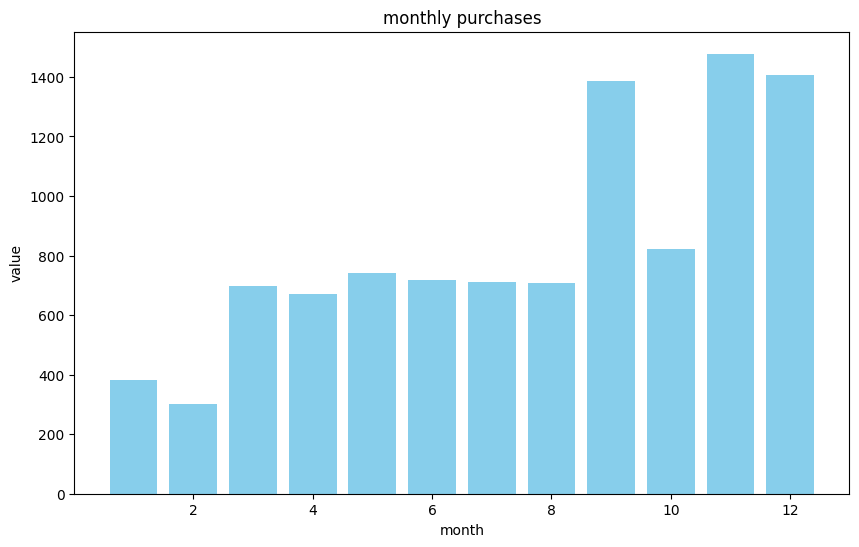

In [92]:
# index를 x축 값으로 사용
index = month.index

# 값은 y축 값으로 사용
values = month['order_month']

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(index, values, color='skyblue')
plt.title('monthly purchases')
plt.xlabel('month')
plt.ylabel('value')

plt.show()

#그래프를 확인하니 9,11,12 즉 연말의 구매횟수가 많고 연초의 구매횟수가 적은 것을 확인할 수 있다.

## 일별 구매횟수

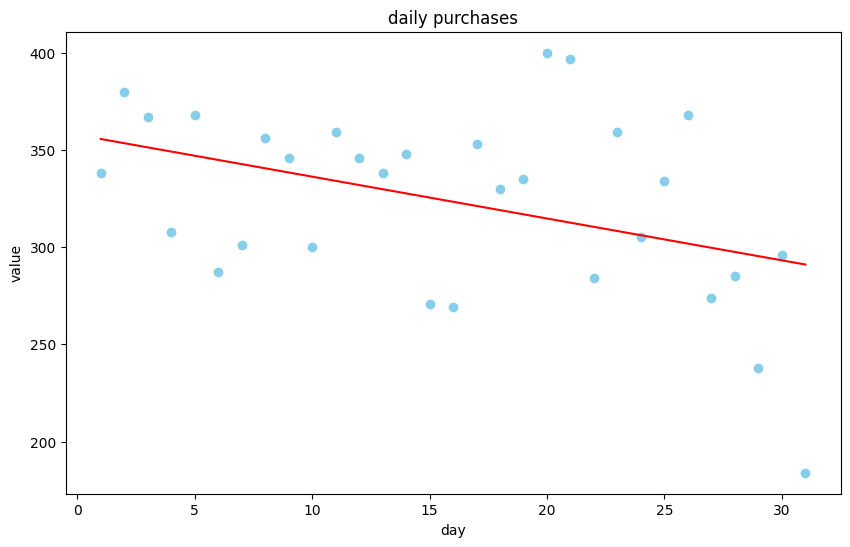

In [98]:
# index를 x축 값으로 사용
index = day.index

# 값은 y축 값으로 사용
values = day['order_day']

# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(index, values, color='skyblue')
plt.title('daily purchases')
plt.xlabel('day')
plt.ylabel('value')

# 회귀선 계산
slope, intercept, r_value, p_value, std_err = stats.linregress(index, values)

# 회귀선 그리기
regression_line = slope * index + intercept
plt.plot(index, regression_line, color='red', label='회귀선')

# 그래프 보여주기
plt.show()

In [100]:
day['index'] = day.index
correlation = day['index'].corr(day['order_day'])

# 결과 출력
print(f'상관계수: {correlation}')

상관계수: -0.40855367186386554


적합된 회귀선과 날짜와 구매건수의 상관계수를 확인할 때 월별 날짜와 구매건수가 음의 상관관계가 있다고 볼 수 있다.


즉 월 초에 구매가 많이 일어나고 월 말로 갈 수록 구매가 적어지는 것을 알 수 있다.

## 월별 구매 카테고리

In [110]:
# 월별 구매 카테고리 빈도표 생성
category_freq = data.groupby(['order_month', 'category']).size().unstack(fill_value=0)

# 결과 출력
category_freq

category,Bakery,Beverages,"Eggs, Meat & Fish",Food Grains,Fruits & Veggies,Oil & Masala,Snacks
order_month,,,,,,,
1,44,63,51,50,51,61,61
2,39,43,38,40,47,40,53
3,101,97,108,86,86,95,123
4,80,100,93,86,93,102,114
5,95,115,110,98,108,115,94
6,105,102,118,82,101,92,117
7,106,92,95,109,109,100,99
8,105,108,102,119,96,88,88
9,206,181,219,190,195,176,216


다음을 이용해

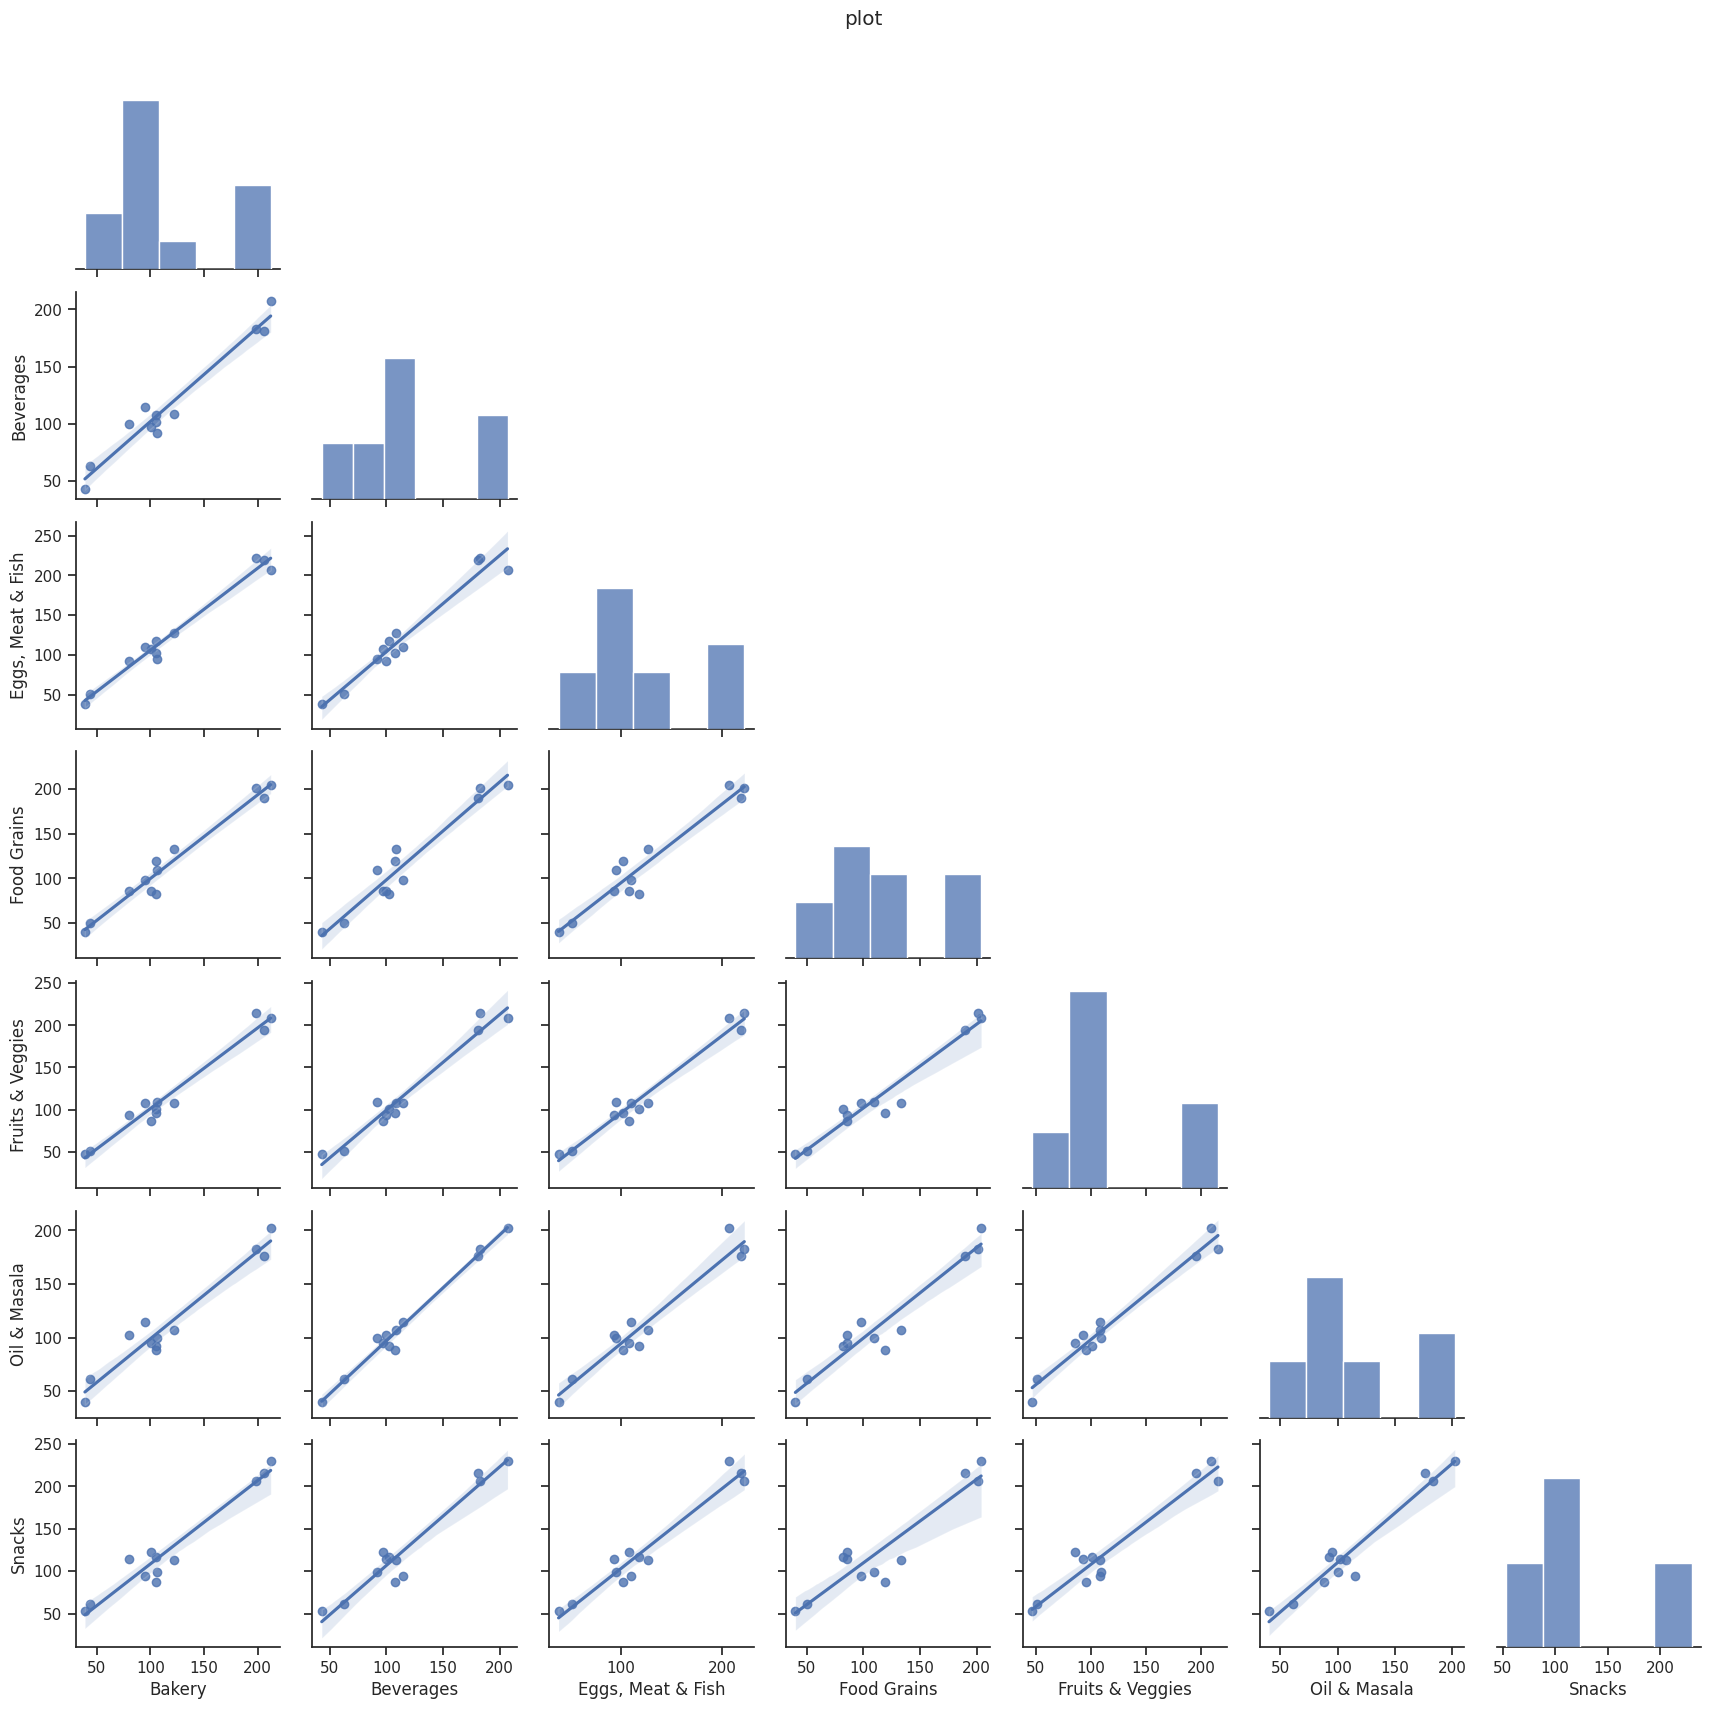

In [125]:
import seaborn as sns
# 카테고리 별로 모두 산점도 행렬 그리기
sns.set(style='ticks')
g = sns.PairGrid(category_freq, corner=True)
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot, kde_kws={'color': 'k'})
g.map_lower(sns.regplot)
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle("plot")
plt.show()

산점도 행렬을 통해 모든 카테고리의 상품은 서로 양의 상관관계를 가진다는 것을 알 수 있다.

## 할인율 별 구매 건수

In [114]:
# 할인율(discount) 별 평균 이익(profit) 계산
average_profit_by_discount = data.groupby('discount')['profit'].mean().reset_index()

# 할인율(discount) 별 구매건수(order_id) 계산
purchase_count_by_discount = data.groupby('discount')['order_id'].count().reset_index()

# 두 데이터프레임을 합치기
result_df = pd.merge(average_profit_by_discount, purchase_count_by_discount, on='discount', how='inner')

# 컬럼 이름 변경
result_df.columns = ['discount', 'average_profit', 'purchase_count']

print(result_df)

    discount  average_profit  purchase_count
0       0.10      361.367548             367
1       0.11      380.107914             374
2       0.12      361.629894             377
3       0.13      396.233538             342
4       0.14      374.307375             381
5       0.15      372.536480             375
6       0.16      383.132176             386
7       0.17      378.632552             337
8       0.18      362.008469             392
9       0.19      370.338993             417
10      0.20      370.353391             348
11      0.21      374.613532             402
12      0.22      363.958333             396
13      0.23      387.522774             393
14      0.24      364.504703             387
15      0.25      375.379499             439
16      0.26      387.043951             405
17      0.27      383.351415             424
18      0.28      379.453280             375
19      0.29      389.692104             366
20      0.30      358.533272             379
21      0.

In [118]:
# 상관계수 계산
correlation_coefficient = result_df['discount'].corr(result_df['average_profit'])

print(correlation_coefficient)

0.02371941059715792


할인율과 순이익에는 상관이 거의 없다.

In [120]:
# 상관계수 계산
correlation_coefficient = result_df['discount'].corr(result_df['purchase_count'])

print(correlation_coefficient)

0.3872928026923514


할인율과 판매건수는 유의미한 상관관계를 가진다.